# Assigmnet 5

1. Load boston setting X as boston.data and y as boston.target

Attempt the grid search using polyregression + (linear, ridge, lasso, elastic net), and 

Does feature mechanisms on ridge/lasso/elastic helps here?

what is the optimal polynomial degree?  What does it mean?

why do you think the result is like this?

what is the value of lambdas, and what does it means?

In [1]:
# Load boston dataset from sklearn here
from sklearn.datasets import load_boston

boston = load_boston()
# boston.feature_names
#print(boston.DESCR)

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = boston.data
y = boston.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

linear_regression_parameters= {'polynomialfeatures__degree':np.arange(1,4)}
linear_regression_model = make_pipeline(PolynomialFeatures(),LinearRegression(normalize=True))

ridge_regression_parameters = {'polynomialfeatures__degree':np.arange(1,4),'ridge__alpha':np.logspace(-1, -4, 4)}
ridge_regression_model = make_pipeline(PolynomialFeatures(),Ridge(normalize=True))

lasso_regression_parameters = {'polynomialfeatures__degree':np.arange(1,4),'lasso__alpha':np.logspace(-1, -4, 4)}
lasso_regression_model = make_pipeline(PolynomialFeatures(),Lasso(normalize=True))

elastic_net_parameters = {'polynomialfeatures__degree': np.arange(1, 4),'elasticnet__alpha': np.logspace(-1, -4, 4),"elasticnet__l1_ratio": np.linspace(0, 1, 3)}
elastic_net_model = make_pipeline(PolynomialFeatures(),ElasticNet(normalize=True))

In [3]:
models = [linear_regression_model,ridge_regression_model,lasso_regression_model,elastic_net_model]
parameters = [linear_regression_parameters,ridge_regression_parameters,lasso_regression_parameters,elastic_net_parameters]

In [4]:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning,
                        module="sklearn")

for i, model in enumerate(models):
    model_search = GridSearchCV(model,parameters[i],cv=cv)
    model_search.fit(X_train,y_train)
    # results = pd.DataFrame(model_search.cv_results_)
    # print(results.iloc[:,[4,5,-3]])
    best_estimator = model_search.best_estimator_
    print("Best Parmeters",model_search.best_params_)
    print("Score",model_search.score(X_test,y_test))
    print(best_estimator[1].coef_)
    print()
    print("------------------------------------------------------------------------------------------------------------------------")
    print()

Best Parmeters {'polynomialfeatures__degree': 1}
Score 0.6771696999851686
[ 0.00000000e+00 -1.54486040e-01  4.13948217e-02 -2.53765225e-02
  7.86055259e-01 -1.29365836e+01  4.03952301e+00 -1.05354914e-02
 -1.33498644e+00  3.18272501e-01 -1.26427463e-02 -9.77287564e-01
  1.26714702e-02 -4.62052176e-01]

------------------------------------------------------------------------------------------------------------------------

Best Parmeters {'polynomialfeatures__degree': 2, 'ridge__alpha': 0.01}
Score 0.8694314395772099
[ 0.00000000e+00  4.36390405e-02 -4.50277893e-02  1.75380742e-01
  2.33334995e+00  9.32924891e+00  3.43636216e+00  4.32929122e-02
 -1.09740035e+00  2.31174956e-01  5.47041104e-03  5.62525393e-02
  5.15888848e-03  5.92132954e-02  2.11872822e-03  1.68482750e-01
  2.81501029e-03  1.79968283e+00 -1.57514001e-01 -3.07187290e-02
  2.43864163e-04 -2.40310550e-02 -1.23083156e-03  1.32390695e-05
  1.09082209e-03 -2.26591228e-04 -3.93667136e-04  4.77299445e-04
 -3.35544814e-03 -2.979

Using ridge/lasso/elastic definitely made the test scores higher. Therefore yes, those feature mechanisms do help. The optimal polynomial degree differs with a different kfold as well as other meta parameters but the 2nd order polynomial seems to be the optimal for most of them. This means that a second order polynomial is enough for the generalization of this dataset. Ridge regression had an alpha of 0.01, lasso had 0.001, and elastic net had 0.001. I

# #2 

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [74]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#only 10 out of 100 features are informative, add some noise to add to the difficulty of the problem
X, y, coef = make_regression(n_samples = 1000, n_features = 100, coef=True,
                         random_state=42, bias=6, noise=50, n_informative=10)

#scaling does not really help with simple linear regression
#since the coefficients can be multiply to certain order but
#with same result.  However, regularized models will be
#affected.  The idea is that the constraint is applied to the
#sum of a function of coefficients.  If we inflate an attribute,
#the coefficient will be deflated, which will affect
#the penalization.  Thus it is best to scale for all regression
#problems since it does not hurt
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

#perform Ridge regression
#plot training and validation errors as function of lambda
#also plot coefficients and coefficients error as function of lambda
#coefficients can be obtained simply using model.coef_
#coeffcient error can be computed using mean_squared_error(model.coef_, w)
#interpret what is happening

In [75]:
# Your code here
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

kfold = KFold(10)

lambda_list = np.logspace(-4,10,100)
lambda_list = np.insert(lambda_list,0,0)
validation_error = []
training_error = []
test_error = []
coefs = []

for lamb in lambda_list:
    ridge_model = Ridge(lamb)
    valid_error = []
    train_error = []
    for train_index, test_index in kfold.split(X_train):
        ridge_model.fit(X_train[train_index],y_train[train_index])
        y_test_pred = ridge_model.predict(X_train[test_index])
        valid_error.append(mean_squared_error(y_train[test_index],y_test_pred))
        y_train_pred = ridge_model.predict(X_train[train_index])
        train_error.append(mean_squared_error(y_train[train_index],y_train_pred))
    ridge_model.fit(X_train,y_train)
    coefs.append(ridge_model.coef_)
    validation_error.append(valid_error)
    training_error.append(train_error)
    test_error.append(mean_squared_error(y_test,ridge_model.predict(X_test)))
validation_error = np.array(validation_error)
training_error = np.array(training_error)
test_error = np.array(test_error)

In [76]:
print(validation_error.shape)
print(training_error.shape)
validation_error = np.mean(validation_error,axis=1)
training_error = np.mean(training_error,axis=1)
print(validation_error.shape)
print(training_error.shape)
print(test_error.shape)

(101, 10)
(101, 10)
(101,)
(101,)
(101,)


In [77]:
coefs = np.array(coefs)
print(coefs.shape)
print(coef.shape)
coef_error = np.mean((coefs-coef)**2,axis=1)
print(coef_error.shape)

(101, 100)
(100,)
(101,)


Text(0, 0.5, 'Coefficient MSE')

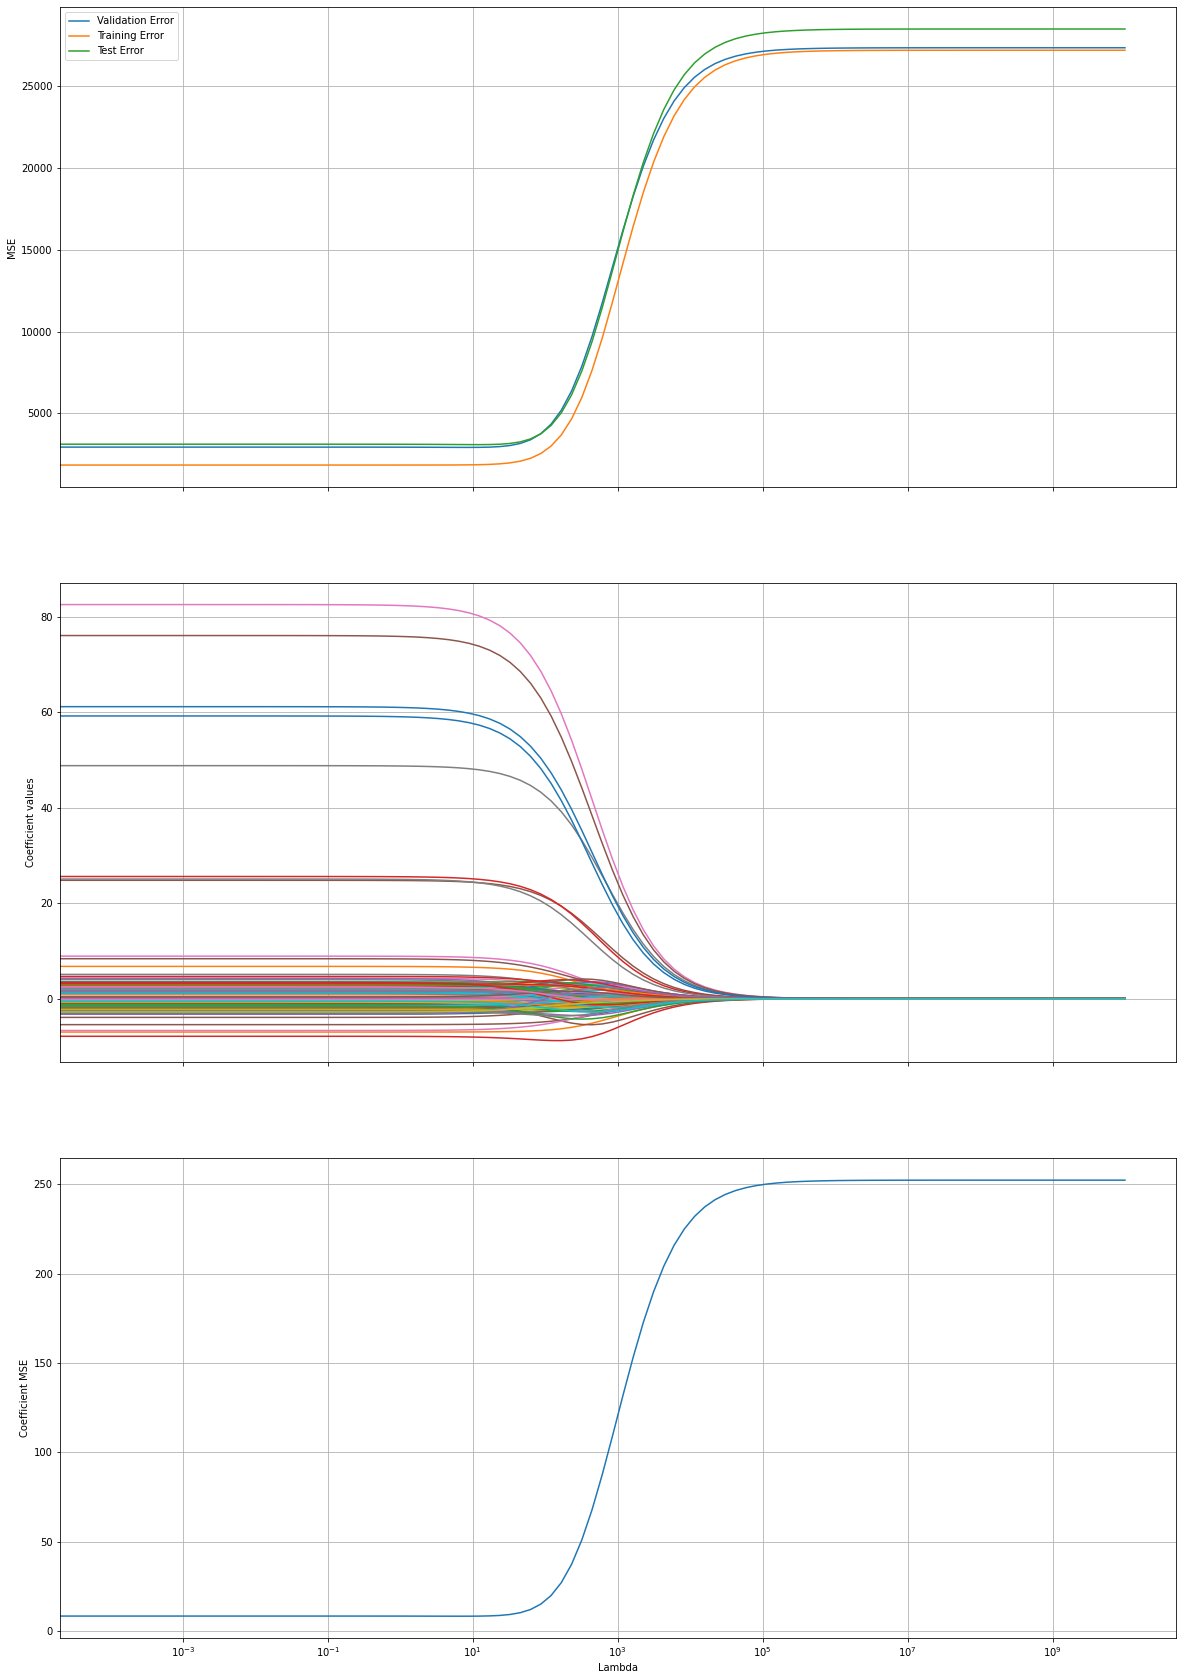

In [78]:
fig,ax = plt.subplots(3,1,figsize=(20,30),sharex=True)

ax[0].plot(lambda_list,validation_error,label="Validation Error")
ax[0].plot(lambda_list,training_error,label="Training Error")
ax[0].plot(lambda_list,test_error,label="Test Error")
ax[0].set_xscale('log')
ax[0].legend()
ax[0].grid(True)
ax[0].set_ylabel("MSE")
#ax[0].set_ylim([2500,2750])

for i,c in enumerate(coefs.T):
    ax[1].plot(lambda_list,c)
ax[1].grid(True)
ax[1].set_ylabel("Coefficient values")

ax[2].plot(lambda_list,coef_error)
ax[2].grid(True)
ax[2].set_xlabel("Lambda")
ax[2].set_ylabel("Coefficient MSE")


In [79]:
minimum_at = np.argmin(test_error)
print("Lowest Test Error:",test_error[minimum_at])
print("Lambda with smallest test error:",lambda_list[minimum_at])
print("Lowest Validation Error:",validation_error[np.argmin(validation_error)])
print("Lambda with smallest Validation error:",lambda_list[np.argmin(validation_error)])
print("Lambda with smallest coefficient error:", lambda_list[np.argmin(coef_error)])

Lowest Test Error: 3091.653677822454
Lambda with smallest test error: 12.32846739442066
Lowest Validation Error: 2922.017613592682
Lambda with smallest Validation error: 8.902150854450374
Lambda with smallest coefficient error: 6.4280731172843195


3.

implement Linear regression from scratch using 

- the closed form OLS

- the gradient descent

- (optional challenge) the closed form OLS using pseudo inverse

- LinearRegression() by sklearn. - please research which algorithm that sklearn use?

measure which one is faster, try to vary the n_features

so what do you think, closed_form or gradient descent?

use the same X y from #1

In [12]:
# Your code here

4.

implement Ridge regression from scratch using 

 - the closed form OLS

 - stochastic gradient descent

 - SGDRegressor() of sklearn using penalty as l2

 - Ridge() by sklearn

loop through several lambda and print the MSE

compare the time as well

use the same X y from #1

In [13]:
# Your code here